In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.array(([3,5],[5,1],[10,2]),dtype=float)

In [3]:
Y = np.array(([75],[82],[93]),dtype=float)

In [4]:
X=X/np.amax(X,axis=0)
Y=Y/100

In [5]:
X

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [6]:
Y

array([[0.75],
       [0.82],
       [0.93]])

In [7]:
class NeuralNetwork(object):
    def __init__(self):
        self.inputLayerSize=2
        self.hiddenLayerSize=3
        self.outputLayerSize=1
        
        self.W1=np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forwardPropagation(self,X):
        self.z2=np.dot(X,self.W1)
        self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.a2,self.W2)
        self.yHat=self.sigmoid(self.z3)
        return self.yHat
    
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def sigmoidPrime(self,z):
        return np.exp(-z)/((1+np.exp(-z))**2)
    def costFunction(self,X,Y):
        self.yHat=self.forwardPropagation(X)
        J=0.5*(sum((Y-self.yHat)**2))
        return J
    def costFunctionPrime(self,X,Y):
        self.yHat=self.forwardPropagation(X)
        
        delta3=np.multiply(-(Y-self.yHat),self.sigmoidPrime(self.z3))
        dJdw2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdw1=np.dot(X.T,delta2)
        
        return dJdw1, dJdw2
    def getParams(self):
        params = np.concatenate((self.W1.ravel(),self.W2.ravel()))
        return params
    def setParams(self,params):
        W1_start=0
        W1_end=self.hiddenLayerSize*self.inputLayerSize
        self.W1=np.reshape(params[W1_start:W1_end],(self.inputLayerSize,self.hiddenLayerSize))
        W2_end=W1_end+self.hiddenLayerSize*self.outputLayerSize
        self.W2=np.reshape(params[W1_end:W2_end],(self.hiddenLayerSize,self.outputLayerSize))
    def computeGradients(self,X,Y):
        dJdw1,dJdw2=self.costFunctionPrime(X,Y)
        return np.concatenate((dJdw1.ravel(),dJdw2.ravel()))
           




def computeGradientCheck(N,X,Y):
    paramsInitial=N.getParams()
    chkgrad=np.zeros(paramsInitial.shape)
    perturb=np.zeros(paramsInitial.shape)
    e=1e-4
    
    for p in range(len(paramsInitial)):
        perturb[p]=e
        N.setParams(paramsInitial+perturb)
        loss2=N.costFunction(X,Y)
        
        N.setParams(paramsInitial-perturb)
        loss1=N.costFunction(X,Y)
        
        chkgrad[p]=(loss2-loss1)/(2*e)
        perturb[p]=0
        
    N.setParams(paramsInitial)
    
    return chkgrad

In [8]:
# BFGS Training
#trainer class

class Trainer(object):
    def __init__(self,N):
        self.N=N
    def callbackF(self,params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X,self.Y))
    def costFunctionWrapper(self, params,X,Y):
        self.N.setParams(params)
        cost=self.N.costFunction(X,Y)
        grad=self.N.computeGradients(X,Y)
        return cost,grad
    def train(self,trainX,trainY,testX,testY):
        self.X=trainX
        self.Y=trainY
        self.testX=testX
        self.testY=testY
        
        self.J=[]
        self.testJ=[]
        
        params0=self.N.getParams()
        options={'maxiter':200,'disp':True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, \
                         jac=True, method='BFGS', \
                         args=(X, Y), options=options, \
                         callback=self.callbackF)
        
        self.N.setParams(_res.x)
        self.optimizationResults=_res


# Training Calculation
NN=NeuralNetwork()
chkgrad=computeGradientCheck(NN,X,Y)
chkgrad
grad=NN.computeGradients(X,Y)
norm(grad-chkgrad)/norm(grad+chkgrad)
        
        
# NN=NeuralNetwork()
# X
# Y
# T=Trainer(NN)
# T.train(X,Y)

# plot(T.J)
# grid(1)
# xlabel('Iterations')
# ylabel('Cost(J)')

# NN.forwardPropagation(X)
# Y

9.801292343871197e-11

Text(0.5, 0, 'Test Score')

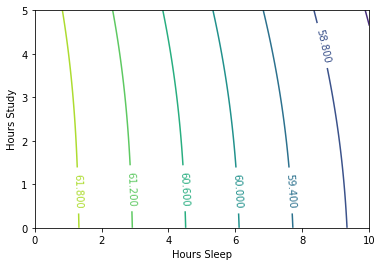

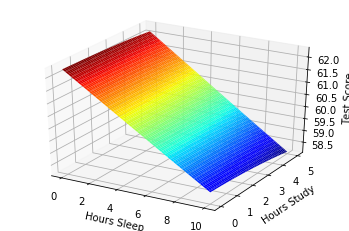

In [9]:
# testing the model

hoursSleep=linspace(0,10,100)
hoursStudy=linspace(0,5,100)

hoursSleepNorm=hoursSleep/10
hoursStudyNorm=hoursStudy/5

a,b= meshgrid(hoursSleepNorm,hoursStudyNorm)

allInputs=np.zeros((a.size,2))
allInputs[:,0]=a.ravel()
allInputs[:,1]=b.ravel()

allOutputs=NN.forwardPropagation(allInputs)
allOutputs

#contour Plot
yy= np.dot(hoursStudy.reshape(100,1),np.ones((1,100)))
xx=np.dot(hoursSleep.reshape(100,1),np.ones((1,100))).T

CS=contour(xx,yy,100*allOutputs.reshape(100,100))
clabel(CS,inline=1, fontsize=10)
xlabel('Hours Sleep')
ylabel('Hours Study')


#3D Plot:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.gca(projection='3d')

surf=ax.plot_surface(xx, yy, 100*allOutputs.reshape(100,100),cmap=cm.jet)
ax.set_xlabel('Hours Sleep')
ax.set_ylabel('Hours Study')
ax.set_zlabel('Test Score')

Text(0, 0.5, 'Cost')

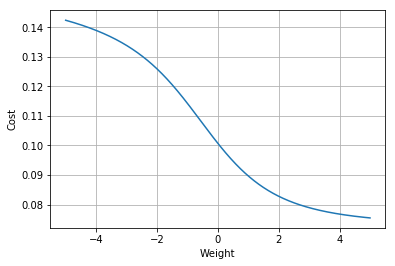

In [10]:
# Method-1 finding minimum weight by trail and error method
weightToTry=np.linspace(-5,5,1000)
cost=np.zeros(1000)
for i in range(1000):
    NN.W1[0,0]=weightToTry[i]
    yHat=NN.forwardPropagation(X)
    cost[i]=0.5*sum((Y-yHat)**2)
plot(weightToTry,cost)
grid(1)
xlabel('Weight')
ylabel('Cost')

In [11]:
# Method-2 Gradient decent method
cost1=NN.costFunction(X,Y)
dJdw1,dJdw2=NN.costFunctionPrime(X,Y)

learningRate = 3
NN.W1=NN.W1+learningRate*dJdw1
NN.W2=NN.W2+learningRate*dJdw2
cost2=NN.costFunction(X,Y)
print (cost1, cost2)

dJdw1,dJdw2=NN.costFunctionPrime(X,Y)
NN.W1=NN.W1-learningRate*dJdw1
NN.W2=NN.W2-learningRate*dJdw2
cost3=NN.costFunction(X,Y)
print (cost2, cost3)

0.07547578820247866 0.2167623422803687
0.2167623422803687 0.02088588539065039


Optimization terminated successfully.
         Current function value: 0.001225
         Iterations: 51
         Function evaluations: 53
         Gradient evaluations: 53


Text(0, 0.5, 'Cost(J)')

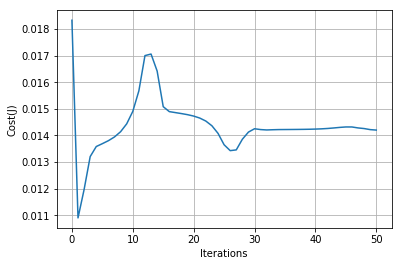

In [12]:
#Training and Testing on new data

trainX=np.array(([3,5],[5,1],[10,2],[6,1.5]),dtype=float)
trainY=np.array(([75],[82],[93],[70]),dtype=float)

testX=np.array(([4,5.5],[4,5.1],[9,2.5],[6,2]),dtype=float)
testY=np.array(([70],[89],[85],[75]),dtype=float)


trainX=trainX/np.amax(trainX,axis=0)
trainY=trainY/100

testX=testX/np.amax(trainX,axis=0)
testY=testY/100

NN=NeuralNetwork()
T=Trainer(NN)
T.train(trainX,trainY,testX,testY)

plot(T.J)
plot(T.testJ)
grid(1)
xlabel('Iterations')
ylabel('Cost(J)')

